In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from scipy.stats import pearsonr

In [4]:
os.chdir('/home/rcgonzal/DSC180Malware/m2v-adversarial-hindroid/')
!pwd

/home/rcgonzal/DSC180Malware/m2v-adversarial-hindroid


In [13]:
features = pd.read_csv('data/out/all-apps/features.csv', index_col='app').iloc[:,1:]
features

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
app,,,,,,,,,,,,,,,,,,,,,
com.whatsapp,0.539050,-0.026114,0.999909,-0.051309,-0.426358,-0.290779,0.391381,0.504571,0.227211,-0.756137,...,0.551811,-1.328201,-0.125733,1.575963,0.768082,1.071718,-2.433286,0.382743,-0.169903,-0.926352
com.instagram.android,-0.857108,-1.012236,1.995195,-0.539776,2.024873,-0.698998,-0.548975,0.763390,0.043426,-0.567140,...,-1.239834,-2.358535,0.997059,0.431494,2.260392,-0.304117,-1.902289,-0.268585,-0.516909,-2.063448
d5a3f90a54a880ceb58143d6f2b2762c,-1.103312,-0.593118,0.030134,-0.972402,-0.347658,0.723656,1.705660,-0.658236,0.251281,0.308426,...,-0.442362,0.458298,-0.308844,0.800347,-0.099746,-0.635400,-1.023382,-0.920745,0.938874,-1.157328
79f2ec8676810e64db312421af39ebfc,1.453660,0.335897,-0.117768,-2.024935,-1.273749,-0.794100,-0.986614,0.606882,1.321142,2.883692,...,0.797474,1.936428,2.221904,4.044598,0.246361,-1.790944,-1.811805,-0.076396,-3.610302,0.166480
com.google.android.inputmethod.latin,0.454195,-0.093940,2.257292,0.194119,0.527684,0.584786,-1.394299,0.969219,-0.561951,0.708028,...,-4.002953,-1.586807,1.496997,0.986335,-0.387341,1.211102,-3.323845,-0.378469,0.425016,1.577752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147a92e4553f102d55d4dbdbd1a0ee8f,0.099297,-0.112312,0.068215,0.058485,-0.103566,0.209433,0.153688,-0.050463,-0.110890,-0.058423,...,-0.157046,-0.053314,-0.084387,0.052638,0.043181,-0.056647,-0.231664,-0.134360,-0.133419,0.022889
0ec096587714b37f24bf39e76e8656ad,0.014914,-0.104951,0.074566,0.060941,-0.174115,0.182127,0.157708,-0.164968,-0.069620,-0.096140,...,-0.177264,-0.024955,-0.084888,0.058877,0.012134,-0.110198,-0.293044,-0.163930,-0.051725,0.028428
e40705f1867ea94ae8ca8e37916dd9e3,0.025631,-0.068294,0.099363,0.091547,-0.182554,0.176520,0.119162,-0.142118,-0.057651,-0.068724,...,-0.123536,-0.061261,-0.057430,0.051364,0.031666,-0.049115,-0.256833,-0.132828,-0.010026,0.073017


In [14]:
labels = pd.read_csv('data/out/all-apps/app_list.csv', index_col='app')['malware']
labels

app
com.kaktus.hyungkaktus              0
com.wedup.duduamzaleg               0
com.dublin_mobile123.cheat_gta_5    0
com.appall.optimizationbox          0
live.wallpaper.t910001560           0
                                   ..
com.nytimes.android                 0
com.tinytouchtales.alchi            0
com.mycelium.wallet                 0
com.aceviral.smashycity             0
com.wonderplanet.CrashFever         0
Name: malware, Length: 6072, dtype: int64

In [33]:
corr = features.apply(lambda col: pearsonr(col, labels), axis=0).T
corr.columns = ['r', 'p_val']
corr.r = np.abs(corr.r)
corr = corr.sort_values('r')
corr

,r,p_val
50,0.000954,9.407790e-01
44,0.001287,9.201121e-01
126,0.001545,9.041830e-01
22,0.002056,8.727559e-01
15,0.003947,7.584545e-01
...,...,...
54,0.242023,1.161376e-81
123,0.263137,1.023066e-96
49,0.265509,1.695501e-98
114,0.303979,5.392514e-130


<AxesSubplot:>

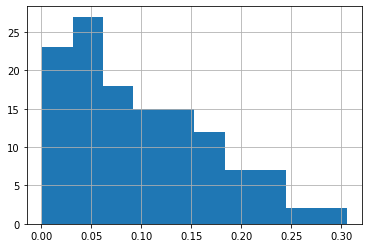

In [35]:
corr.r.hist()